In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [168]:
df = pd.read_csv('/Users/youziya/OneDrive - York University/MBAN 6100 DATA SCIENCE I/Dataset/RAW_recipes.csv')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [170]:
df.describe(include='all')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
count,231636,231637.000000,2.316370e+05,2.316370e+05,231637,231637,231637,231637.000000,231637,226658,231637,231637.000000
unique,230185,NaN,NaN,NaN,5090,209115,229318,NaN,231074,222668,230475,NaN
top,crock pot lemon garlic chicken,NaN,NaN,NaN,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,['blend all ingredients until smooth'],yum,"['eggs', 'water']",NaN
freq,3,NaN,NaN,NaN,470,397,36,NaN,20,153,10,NaN
mean,NaN,222014.708984,9.398546e+03,5.534885e+06,NaN,NaN,NaN,9.765499,NaN,NaN,NaN,9.051153
std,NaN,141206.635626,4.461963e+06,9.979141e+07,NaN,NaN,NaN,5.995128,NaN,NaN,NaN,3.734796
min,NaN,38.000000,0.000000e+00,2.700000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,NaN,99944.000000,2.000000e+01,5.690500e+04,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000
50%,NaN,207249.000000,4.000000e+01,1.736140e+05,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,9.000000
75%,NaN,333816.000000,6.500000e+01,3.982750e+05,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,11.000000


In [171]:
# description, steps and submitted are not necessary for the analysis therefore we're dropping the description column.
df.drop(['description', 'steps', 'submitted'], axis=1, inplace=True)

In [172]:
# Checking and making sure the description, steps and submitted columns are gone
df.head()

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [173]:
df.isnull().sum()

name              1
id                0
minutes           0
contributor_id    0
tags              0
nutrition         0
n_steps           0
ingredients       0
n_ingredients     0
dtype: int64

In [174]:
df2 = df.dropna()

In [175]:
#seperate the information from nutrition column
df2['nutrition'] = df2['nutrition'].str.replace('[', '').str.replace(']', '')

/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_884/4053744037.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['nutrition'] = df2['nutrition'].str.replace('[', '').str.replace(']', '')
/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_884/4053744037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nutrition'] = df2['nutrition'].str.replace('[', '').str.replace(']', '')


In [176]:
NutriList=['Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']

In [177]:
NutriList_Columns = pd.DataFrame(df2['nutrition'].apply(eval).to_list(), index=df2.index, columns=NutriList)

In [178]:
df2 = df2.join(NutriList_Columns)

In [179]:
df2.head(5)

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...","51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...","173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...","269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0",6,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...","368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0",11,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...","352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [180]:
#converting the nutrition columns to float as there are numbers such as 51.5, interger data type is not compatiable.
df2['nutrition'] = df2['nutrition'].str.split(',').apply(lambda x: [float(val) for val in x])


In [181]:
#Continuing seperating data from nutrition column
df2[['Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']] = pd.DataFrame(df2['nutrition'].tolist(), index=df2.index) 

In [182]:
df2.head()

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            231636 non-null  object 
 1   id              231636 non-null  int64  
 2   minutes         231636 non-null  int64  
 3   contributor_id  231636 non-null  int64  
 4   tags            231636 non-null  object 
 5   nutrition       231636 non-null  object 
 6   n_steps         231636 non-null  int64  
 7   ingredients     231636 non-null  object 
 8   n_ingredients   231636 non-null  int64  
 9   Calories        231636 non-null  float64
 10  Total_fat       231636 non-null  float64
 11  Sugar           231636 non-null  float64
 12  Sodium          231636 non-null  float64
 13  Protein         231636 non-null  float64
 14  Saturated_fat   231636 non-null  float64
 15  Carbs           231636 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 38.1+ M

In [184]:
df2.drop('nutrition', axis=1, inplace=True)

In [185]:
df2.head()

,name,id,minutes,contributor_id,tags,n_steps,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...",6,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            231636 non-null  object 
 1   id              231636 non-null  int64  
 2   minutes         231636 non-null  int64  
 3   contributor_id  231636 non-null  int64  
 4   tags            231636 non-null  object 
 5   n_steps         231636 non-null  int64  
 6   ingredients     231636 non-null  object 
 7   n_ingredients   231636 non-null  int64  
 8   Calories        231636 non-null  float64
 9   Total_fat       231636 non-null  float64
 10  Sugar           231636 non-null  float64
 11  Sodium          231636 non-null  float64
 12  Protein         231636 non-null  float64
 13  Saturated_fat   231636 non-null  float64
 14  Carbs           231636 non-null  float64
dtypes: float64(7), int64(5), object(3)
memory usage: 36.3+ MB


In [187]:
# Check for duplicate rows, excluding the 'id' column as 'id' column is a unique identifier for each recipe
duplicate_rows = df2.duplicated(subset=df2.columns.difference(['id'])) 

In [188]:
# Count the number of duplicate rows and there is no duplicate rows. No need to drop duplicatets
num_duplicate_rows = duplicate_rows.sum() 
num_duplicate_rows

0

In [189]:
numeric_columns = ['minutes', 'n_steps', 'n_ingredients', 'Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']

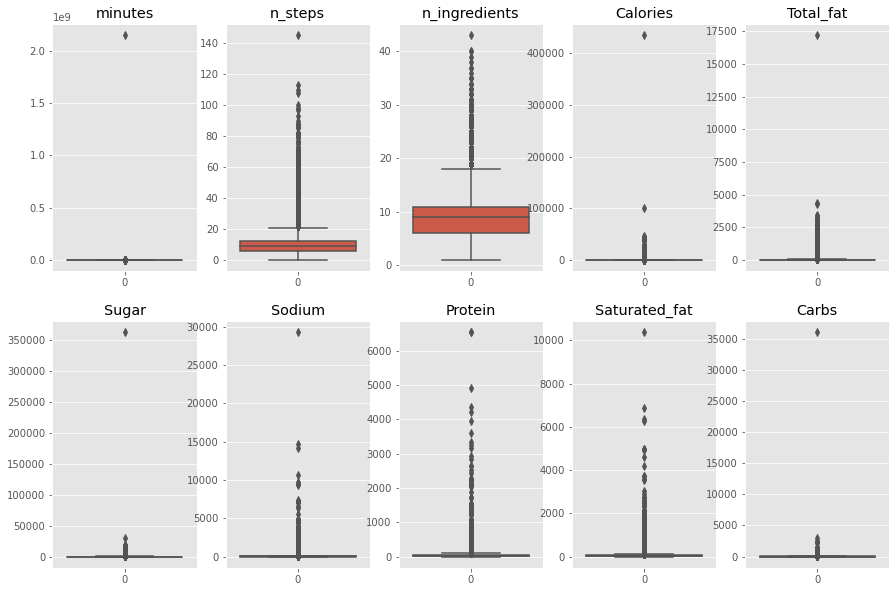

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined numeric_columns and df2

plt.style.use('ggplot')
fig, axis = plt.subplots(2, 5, figsize=(15, 10))
axis = axis.ravel()

for i, ax in enumerate(axis):
    df3 = df2[numeric_columns[i]].values
    sns.boxplot(data=df3, ax=ax)
    ax.set(title=numeric_columns[i])

plt.show()


In [191]:
#we will drop the outlier from all the nurtition columns, we'll drop minutes after dropping all the nutrition segments
drop_minutes_outliers = df2[df2['minutes']>130].index
drop_minutes_outliers
df2.drop(drop_minutes_outliers, inplace=True)


drop_n_steps_outliers = df2[df2['n_steps']>25].index
drop_n_steps_outliers
df2.drop(drop_n_steps_outliers, inplace=True)

drop_n_ingredients_outliers = df2[df2['n_ingredients']>20].index
drop_n_ingredients_outliers
df2.drop(drop_n_ingredients_outliers, inplace=True)

drop_Calories_outliers = df2[df2['Calories']>1000].index
drop_Calories_outliers
df2.drop(drop_Calories_outliers, inplace=True)

drop_Total_fat_outliers = df2[df2['Total_fat']>70].index
drop_Total_fat_outliers
df2.drop(drop_Total_fat_outliers, inplace=True)

drop_Sugar_outliers = df2[df2['Sugar']>110].index
drop_Sugar_outliers
df2.drop(drop_Sugar_outliers, inplace=True)

drop_Sodium_outliers = df2[df2['Sodium']>60].index
drop_Sodium_outliers
df2.drop(drop_Sodium_outliers, inplace=True)

drop_Protein_outliers = df2[df2['Protein']>90].index
drop_Protein_outliers
df2.drop(drop_Protein_outliers, inplace=True)

drop_Saturated_fat_outliers = df2[df2['Saturated_fat']>90].index
drop_Saturated_fat_outliers
df2.drop(drop_Saturated_fat_outliers, inplace=True)

drop_Carbs_outliers = df2[df2['Carbs']>30].index
drop_Carbs_outliers
df2.drop(drop_Carbs_outliers, inplace=True)

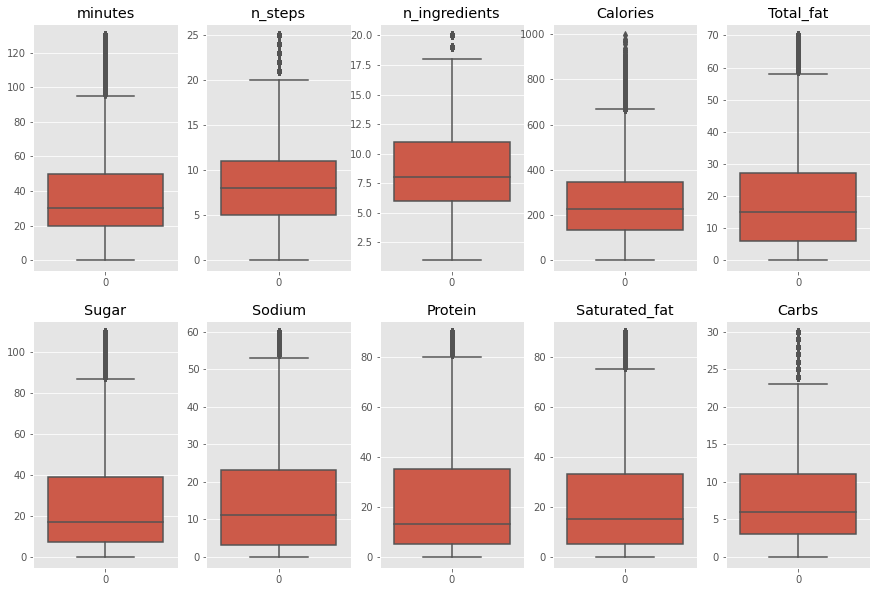

In [192]:
# give another look at the dataset distribution after removing outliers
plt.style.use('ggplot')
fig, axis = plt.subplots(2, 5, figsize=(15, 10))
axis = axis.ravel()

for i, ax in enumerate(axis):
    df3 = df2[numeric_columns[i]].values
    sns.boxplot(data=df3, ax=ax)
    ax.set(title=numeric_columns[i])

plt.show()

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140959 entries, 0 to 231636
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            140959 non-null  object 
 1   id              140959 non-null  int64  
 2   minutes         140959 non-null  int64  
 3   contributor_id  140959 non-null  int64  
 4   tags            140959 non-null  object 
 5   n_steps         140959 non-null  int64  
 6   ingredients     140959 non-null  object 
 7   n_ingredients   140959 non-null  int64  
 8   Calories        140959 non-null  float64
 9   Total_fat       140959 non-null  float64
 10  Sugar           140959 non-null  float64
 11  Sodium          140959 non-null  float64
 12  Protein         140959 non-null  float64
 13  Saturated_fat   140959 non-null  float64
 14  Carbs           140959 non-null  float64
dtypes: float64(7), int64(5), object(3)
memory usage: 17.2+ MB


In [195]:
# skewness helps us understand how the data is distributed. 
#Skewness of 'minutes' is 1.0841 indicates that it's a positively skewed distribution, there might be a few instances with higher 'minutes,' but most of the data is lower minutes and time-saving.
#Skewness of 'n_steps' is 0.1558 means the distribution is nearly symmetrical. It's normal distribution meaning that the dataset involve all kinds of steps.
#Skewness of 'n_ingredients' is 0.6749 indicates that it is moderately skewed. It's amlomost noraml distributiom but tend to be less ingredients.
from scipy import stats
print(stats.skew(df2['minutes']))
print(stats.skew(df2['n_steps']))
print(stats.skew(df2['n_ingredients']))

1.0841467654317023
0.8264048528688916
0.48092838587990017


In [196]:
# Kurtosis of 'minutes' is 1.1559 means that there might be some outliers compared to a normal distribution. This suggests that there are extreme values in the dataset, but mostly normal distribution.
# Kurtosis of 'n_steps': A kurtosis value of -0.8006 for the 'n_steps' column suggests that the distribution has lighter tails and is slightly less peaked compared to a normal distribution. This indicates that the 'n_steps' data is less extreme and has a flatter peak compared to a standard normal distribution.
# Kurtosis of 'n_ingredients' is 0.8180 and suggests that the distribution is moderately peaked compared to a normal distribution. This indicates that the 'n_ingredients' data has some outliers or extreme values, but not too many.

print(stats.kurtosis(df2['minutes']))
print(stats.kurtosis(df2['n_steps']))
print(stats.kurtosis(df2['n_ingredients']))

1.1558867811501647
0.5431585483459309
-0.015443810921659917


In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140959 entries, 0 to 231636
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            140959 non-null  object 
 1   id              140959 non-null  int64  
 2   minutes         140959 non-null  int64  
 3   contributor_id  140959 non-null  int64  
 4   tags            140959 non-null  object 
 5   n_steps         140959 non-null  int64  
 6   ingredients     140959 non-null  object 
 7   n_ingredients   140959 non-null  int64  
 8   Calories        140959 non-null  float64
 9   Total_fat       140959 non-null  float64
 10  Sugar           140959 non-null  float64
 11  Sodium          140959 non-null  float64
 12  Protein         140959 non-null  float64
 13  Saturated_fat   140959 non-null  float64
 14  Carbs           140959 non-null  float64
dtypes: float64(7), int64(5), object(3)
memory usage: 17.2+ MB


In [198]:
numeric_columns = df2.select_dtypes(include=np.number).columns
corr = df2[numeric_columns].corr()['n_steps'].sort_values()

In [199]:
corr

contributor_id    0.021430
Sugar             0.036877
id                0.048049
Sodium            0.106709
Carbs             0.158475
Total_fat         0.165560
Protein           0.167827
Saturated_fat     0.176438
Calories          0.210358
minutes           0.373295
n_ingredients     0.410865
n_steps           1.000000
Name: n_steps, dtype: float64

In [200]:
numeric_columns = df2.select_dtypes(include=np.number).columns
corr = df2[numeric_columns].corr()['n_ingredients'].sort_values()

In [201]:
corr

contributor_id    0.007980
id                0.028214
Sugar             0.058580
Saturated_fat     0.117728
Total_fat         0.208688
Carbs             0.228806
Sodium            0.264751
Protein           0.270037
Calories          0.295028
minutes           0.332106
n_steps           0.410865
n_ingredients     1.000000
Name: n_ingredients, dtype: float64

In [204]:
numeric_columns = df2.select_dtypes(include=np.number).columns
corr = df2[numeric_columns].corr()['minutes'].sort_values()

In [205]:
corr

id               -0.033467
contributor_id    0.002390
Sugar             0.051889
Carbs             0.163215
Sodium            0.163986
Total_fat         0.165580
Saturated_fat     0.176883
Protein           0.179131
Calories          0.213715
n_ingredients     0.332106
n_steps           0.373295
minutes           1.000000
Name: minutes, dtype: float64

In [206]:
#Caluclating the confusion matrix to see if there's strong correlation between each other
correlation_matrix = df2.corr()

In [207]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      id   minutes  contributor_id   n_steps  n_ingredients  \
id              1.000000 -0.033467        0.105110  0.048049       0.028214   
minutes        -0.033467  1.000000        0.002390  0.373295       0.332106   
contributor_id  0.105110  0.002390        1.000000  0.021430       0.007980   
n_steps         0.048049  0.373295        0.021430  1.000000       0.410865   
n_ingredients   0.028214  0.332106        0.007980  0.410865       1.000000   
Calories        0.005738  0.213715        0.004553  0.210358       0.295028   
Total_fat       0.002042  0.165580        0.006463  0.165560       0.208688   
Sugar          -0.014612  0.051889        0.002019  0.036877       0.058580   
Sodium          0.004674  0.163986        0.006147  0.106709       0.264751   
Protein        -0.003632  0.179131        0.001242  0.167827       0.270037   
Saturated_fat  -0.020979  0.176883        0.003580  0.176438       0.117728   
Carbs           0.008819  0.1632

In [208]:
#From here, we will see correlations between minutes, n_steps and n_ingredients
variable1 = 'minutes'
variable2 = 'n_steps'
pearsons_corr = df2['minutes'].corr(df2['n_steps'])

In [209]:
print(pearsons_corr)

0.3732951911224487


In [210]:
variable3 = 'n_ingredients'
variable4 = 'n_steps'
pearsons_corr = df2['n_ingredients'].corr(df2['n_steps'])

In [211]:
print(pearsons_corr)

0.4108649885734997


In [212]:
variable5 = 'minutes'
variable6 = 'n_ingredients'
pearsons_corr = df2['minutes'].corr(df2['n_ingredients'])

In [213]:
print(pearsons_corr)

0.33210611625275077


In [214]:
#From the Pearsons correlation score, we can conclude that n_steps and n_ingredients have the strongest correlation as their score is the highest.

In [215]:
#From here, we will calculate the VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant 
df_with_constant = add_constant(df2) 

In [216]:
numeric_cols = df_with_constant.select_dtypes(include=[np.number]) 

In [217]:
vif = pd.DataFrame() 
vif["variables"] = numeric_cols.columns 
vif["VIF"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])] 
print(vif)

         variables        VIF
0            const  12.754115
1               id   1.019133
2          minutes   1.248221
3   contributor_id   1.011529
4          n_steps   1.335239
5    n_ingredients   1.393266
6         Calories  37.786063
7        Total_fat  14.764736
8            Sugar   1.244291
9           Sodium   1.585984
10         Protein   5.598435
11   Saturated_fat   3.311773
12           Carbs   9.713134


In [218]:
#Explanation of the VIF scores
#id: The VIF of 1.01 suggests that this variable is not correlated with the other variables.
#minutes: The VIF of 7.05 indicates that this variable has a moderate level of multicollinearity with the other variables.
#contributor_id: The VIF of 1.01 suggests that this variable is not correlated with the other variables.
#n_steps: The VIF of 1.22 suggests that this variable has a low corrleation with other variables
#n_ingredients: The VIF of 1.22 suggests that this variable has a low correlation with other variables.
#sqrt_minutes: The VIF of 7.38 suggests that this variable has a moderate correlation with other variables.

In [219]:
#From here, we will begin t test and p value calcuation
median_steps = df['n_steps'].median()


In [220]:
# Preparing for the test by dividing the dataset into two categories based on the median of n_steps
# Note to AJ and Rhaul: you can change this setting if you want. I did this bc i'm not sure what exactly feature you want
easy_to_cook = df[df['n_steps'] <= median_steps]['n_ingredients']
hard_to_cook = df[df['n_steps'] > median_steps]['n_ingredients']

In [221]:
# The t-statistic is -184.61 represents the significant difference between the two groups. 
# Since the p-value 0 and less than 0.05 means there's statistically significant difference between "easy to cook" and "hard to cook".
# As t-statistic is negative, the "easy to cook" have fewer ingredients than the "hard to cook".
t_stat, p_value = stats.ttest_ind(easy_to_cook, hard_to_cook, equal_var=False)

t_stat, p_value

(-184.60593341555162, 0.0)